In [1]:
import h5py
import matplotlib.pyplot as plt

from pyDFCSR3D_post_processor import *

In [2]:
%matplotlib widget

new_beam_filepaths = ["/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/0.h5",
                      "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/9.h5",
                      "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/16.h5"]

old_beam_filepaths = ["/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-2024-07-19T14_23_08-07_00-particles-1.h5",
                       "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-2024-07-19T14_23_08-07_00-particles-10.h5",
                       "/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-2024-07-19T14_23_08-07_00-particles-end.h5"]

new_histograms = [file2histograms(200, 150, 5, 5, filepath) for filepath in new_beam_filepaths]
old_histograms = [file2histograms(200, 150, 5, 5, filepath) for filepath in old_beam_filepaths]

new_statistics = load_new_data("/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/new_code_data.h5")
old_statistics = load_old_data("/Users/treyfischbach/Desktop/Stuff/Research/SLAC 2024/Program Output/Benchmarking new code to old code/dipole-2024-07-19T14_23_08-07_00-statistics.h5")

step_values = [1, 10, 16]


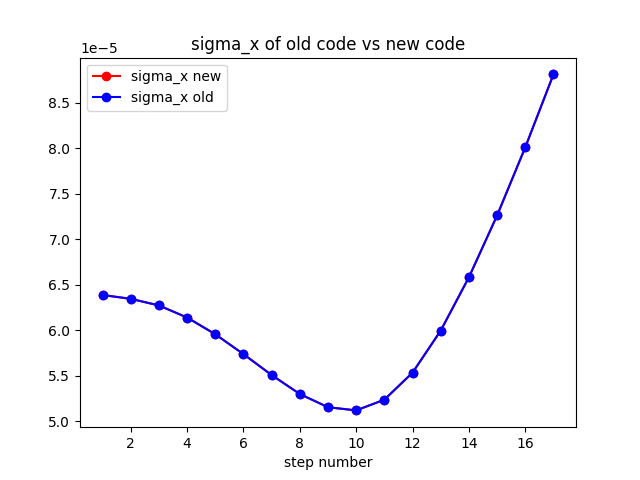

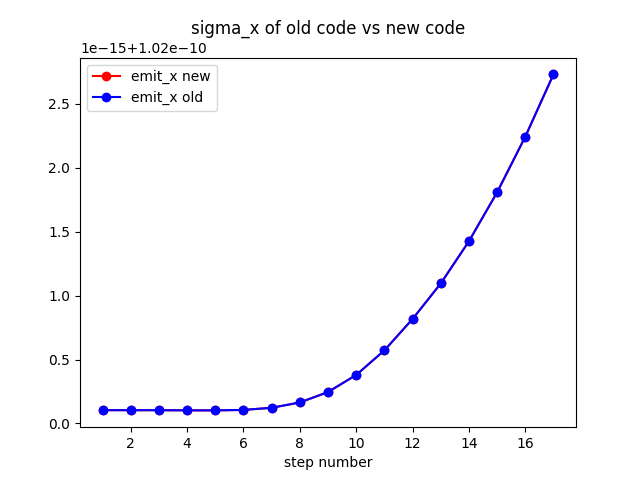

In [3]:
# Plots some statistics
plt.figure()
plot_statistic(new_statistics["sigma_x"], new_figure=False, label="sigma_x new", color="red")
plot_statistic(old_statistics["sigma_x"], new_figure=False, label="sigma_x old", color="blue")
plt.title("sigma_x of old code vs new code")
plt.xlabel("step number")
plt.legend()
plt.show()

plt.figure()
plot_statistic(new_statistics["twiss"]["emit_x"], new_figure=False, label="emit_x new", color="red")
plot_statistic(old_statistics["twiss"]["emit_x"], new_figure=False, label="emit_x old", color="blue")
plt.title("sigma_x of old code vs new code")
plt.xlabel("step number")
plt.legend()
plt.show()

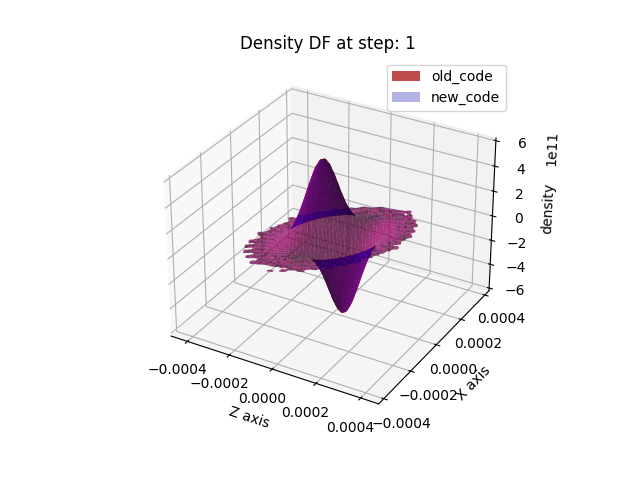

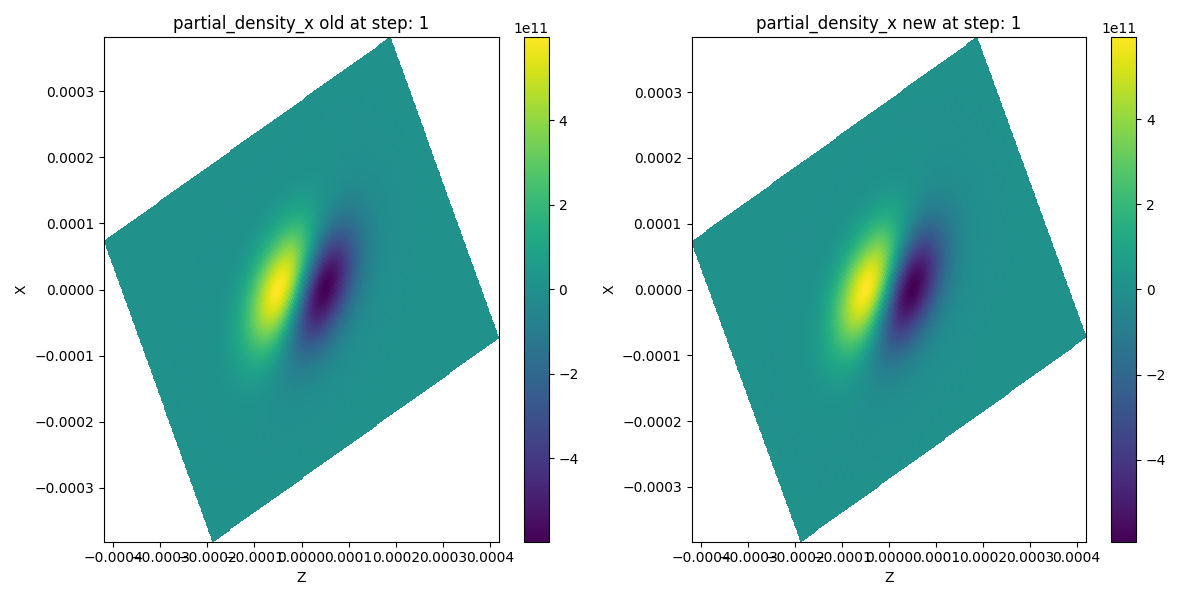

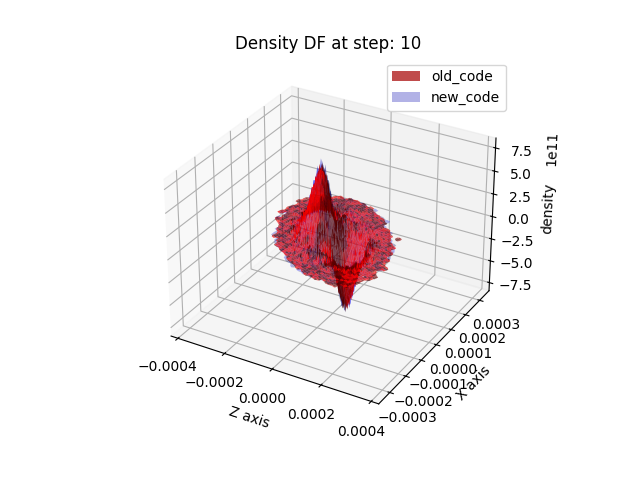

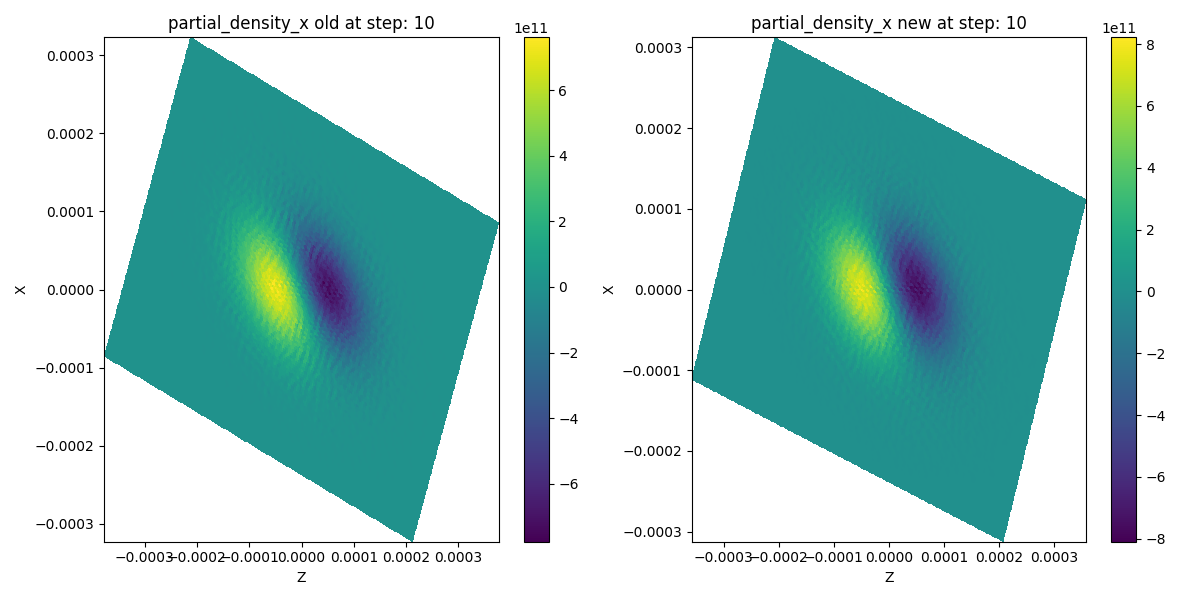

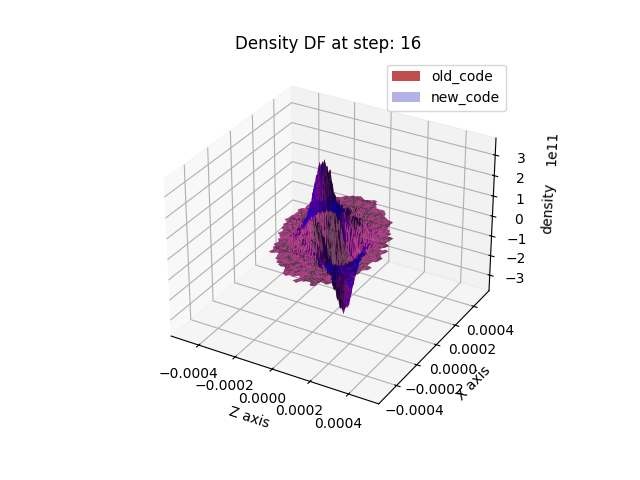

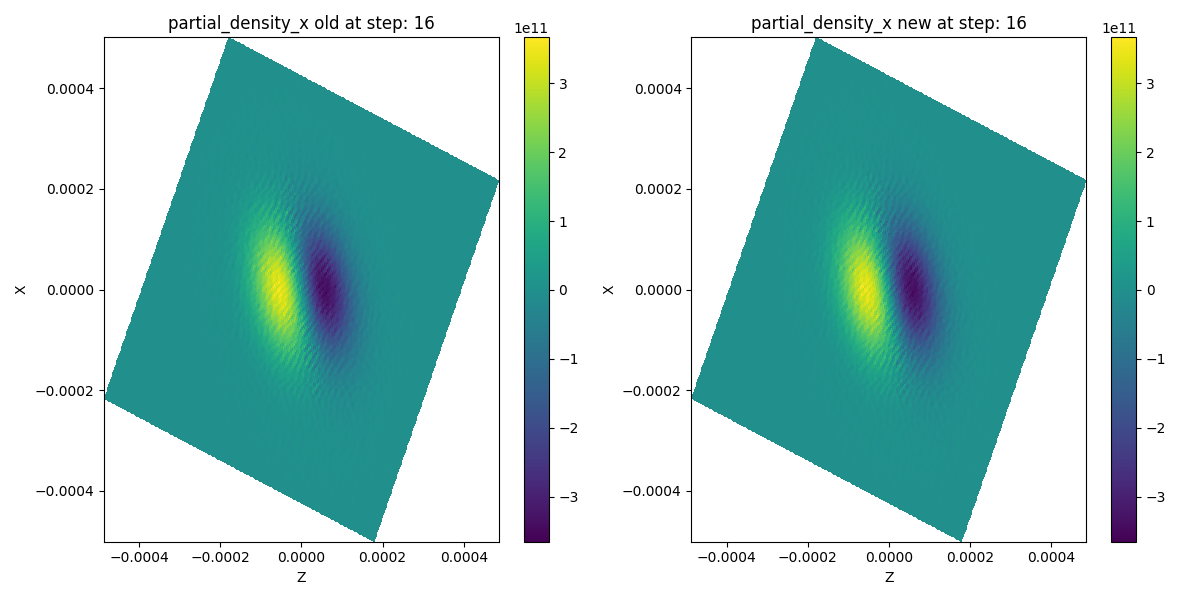

In [4]:
# Compare the density and beta_x distributions functions
for index in range(len(new_beam_filepaths)):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plot_surface2((old_histograms[index])["mesh_coords"], (old_histograms[index])["partial_density_z"], fig=fig, ax=ax, alpha=0.7, color="red", label="old_code")
    plot_surface2((new_histograms[index])["mesh_coords"], (new_histograms[index])["partial_density_z"], fig=fig, ax=ax, alpha=0.3, color="blue", label="new_code")

    ax.set_title("Density DF at step: "+ str(step_values[index]))
    ax.set_xlabel('Z axis')
    ax.set_ylabel('X axis')
    ax.set_zlabel('density')
    ax.set_aspect('auto')
    ax.legend()
    plt.show()

    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    plot_histogram2((old_histograms[index])["mesh_coords"], (old_histograms[index])["partial_density_z"], title="partial_density_x old at step: "+ str(step_values[index]), ax=ax[0], fig=fig)
    plot_histogram2((new_histograms[index])["mesh_coords"], (new_histograms[index])["partial_density_z"], title="partial_density_x new at step: "+ str(step_values[index]), ax=ax[1], fig=fig)
    plt.tight_layout()
    plt.show()  

    


